In [1]:
import numpy as np

from ge.classify import read_node_label, Classifier
from ge import Node2Vec
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import networkx as nx
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

In [2]:
def evaluate_embeddings(embeddings):
    X, Y = read_node_label('../data/wiki/wiki_labels.txt')
    tr_frac = 0.8
    print("Training classifier using {:.2f}% nodes...".format(
        tr_frac * 100))
    clf = Classifier(embeddings=embeddings, clf=LogisticRegression())
    clf.split_train_evaluate(X, Y, tr_frac)


def plot_embeddings(embeddings,):
    X, Y = read_node_label('../data/wiki/wiki_labels.txt')

    emb_list = []
    for k in X:
        emb_list.append(embeddings[k])
    emb_list = np.array(emb_list)

    model = TSNE(n_components=2)
    node_pos = model.fit_transform(emb_list)

    color_idx = {}
    for i in range(len(X)):
        color_idx.setdefault(Y[i][0], [])
        color_idx[Y[i][0]].append(i)

    for c, idx in color_idx.items():
        plt.scatter(node_pos[idx, 0], node_pos[idx, 1], label=c)
    plt.legend()
    plt.show()

In [3]:
G=nx.read_edgelist('../data/wiki/Wiki_edgelist.txt',
                         create_using = nx.DiGraph(), nodetype = None, data = [('weight', int)])
model = Node2Vec(G, walk_length=10, num_walks=80,
                    p=0.25, q=4, workers=1, use_rejection_sampling=0)
model.train(window_size = 5, iter = 3)
embeddings=model.get_embeddings()

Preprocess transition probs...
Learning embedding vectors...
Learning embedding vectors done!


In [4]:
evaluate_embeddings(embeddings)

Training classifier using 80.00% nodes...
-------------------
{'micro': 0.6611226611226612, 'macro': 0.5454405158429038, 'samples': 0.6611226611226612, 'weighted': 0.6564522378400021, 'acc': 0.6611226611226612}


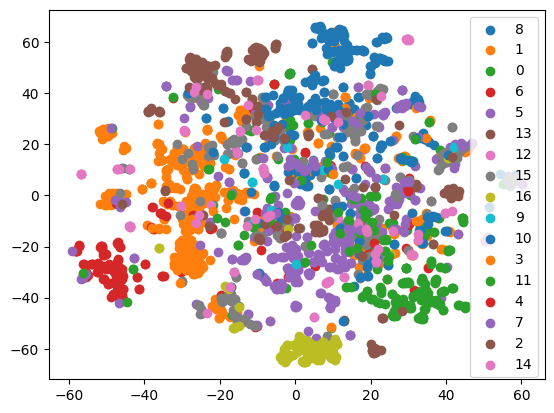

In [5]:
plot_embeddings(embeddings)